# Datenauswertung Kompotoi Team A

### Last modified: Pascal Berger, 17.04.2021

### Last Run:

In [36]:
import datetime
print(datetime.datetime.now())

2021-05-07 15:25:35.458237


## Read data from sigfox api


Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [37]:
# packages import
import time
import requests
import json
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

from matplotlib import *
import matplotlib.pyplot as plt
import plotly.express as px


In [38]:
# helper function
def make_sorter(l):
    """
    Create a dict from the list to map to 0..len(l)
    Returns a mapper to map a series to this custom sort order
    """
    sort_order = {k:v for k,v in zip(l, range(len(l)))}
    return lambda s: s.map(lambda x: sort_order[x])

Login to api

In [39]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [40]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timezone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,60953fcfd22b01560cae2079.b1af8bd7a6b1bac6cace7...


get devices data

In [41]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [42]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,1F2504E,60476e95362d421c28ee0058,"B1 (PTH-04E, ex. Türe Beschl.)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '609503df2948b4666bf5f014', 'keys': [...",[],[],"{'_id': '609503df2948b4666bf5f014', 'keys': [{...",NaN
1,1F25047,60476e95362d421c28ee0058,"B2 (PTH-047, ex. Riegel Besch)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '60952b3fd22b01560ca9ca89', 'keys': [...",[],[],"{'_id': '60952b3fd22b01560ca9ca89', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
2,2203AFA,60476e95362d421c28ee0058,"M1 (POC-AFA, ex. Türe Mag. a)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60953d15d22b01560cad99dc', 'keys': [...",[],[],"{'_id': '60953d15d22b01560cad99dc', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AF9,60476e95362d421c28ee0058,M2 (POC-AF9),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '60952330d22b01560ca81786', 'keys': [...",[],[],"{'_id': '60952330d22b01560ca81786', 'keys': [{...",NaN
4,2203ACB,60476e95362d421c28ee0058,"M3 (POC-ACB, ex. Riegel Mag.)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '609526a03da6385bc7bf508f', 'keys': [...",[],[],"{'_id': '609526a03da6385bc7bf508f', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."
5,2203AAB,60476e95362d421c28ee0058,"M4 (POC-AAB, ex. Türe Mag. in)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'activi...","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '60953975d22b01560cacf029', 'keys': [...",[],[],"{'_id': '60953975d22b01560cacf029', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."


---
## Read sensor data to dataframe

In [43]:
def get_data(message_data_combined, month, skip):
    # iterate every month to avoid data overflow, set max limit data 10'000
    first_date = (pd.to_datetime(f'2021-{month}-01'))
    last_date = (pd.to_datetime(f'2021-{month}-01') + MonthEnd(1)).tz_localize('UTC')
    # print(last_date)
    first_date_unix = round(time.mktime(first_date.timetuple()))
    last_date_unix = round(time.mktime(last_date.timetuple()))
    # print(last_date_unix)
    url = f"https://www.iofrog.com/api/v2/devices/{deviceid}/messages?year=2021&month={month}&limit=10000&skip={skip}" # ?timestampFrom={first_date_unix}&timestampTo{last_date_unix}&limit=10000

    print(url)

    headers = {
      'Authorization': 'Bearer ' + access_token,
      'Content-Type': 'application/json',
      'Cookie': ''
    }
    message_response = requests.request("GET", url, headers=headers)
    # print(response.text)
    message_dict = json.loads(message_response.text)
    # json response to dataframe
    if 'code' in message_dict:
      print("Error reading sensor messages from device: " + deviceid)
      print(message_dict)
    else:
      message_data = pd.DataFrame.from_dict(message_dict['data'])
      message_data = message_data.drop(columns=['keys'])
      message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
      message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
      message_data_keys.reset_index(inplace=True)
      message_data_keys = message_data_keys.groupby('_id').sum()
      #print(message_data_keys)
      # join df's
      message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
      # convert to datetime
      message_data['created'] = pd.to_datetime(message_data['created'])
      # cut data from end, because limit is preferred over timestampTo
      message_data = message_data[message_data['created'].dt.date <= last_date.date()]
      # print(message_data.shape)
      # print(message_data['created'].min())
      first_recortded_date = message_data['created'].dropna().min()
      last_recorded_date = message_data['created'].dropna().max()
      # check if data is valid
      if (first_recortded_date.date() != first_date.date()):
        print(f"Not all datapoints received: First recorded date: {first_recortded_date}")
      if (last_recorded_date.date() < last_date.date()) & (last_recorded_date.date() != pd.Timestamp.now().date()):
        print(f"Not all datapoints received: Last recorded date: {last_recorded_date}")
      # check if more than the maximum data was received in this period
      if len(message_data) >= 10000:
        print(f"Data overflow: {deviceid} exceeded 10'000 values in one month!")
        skip += 10000
        # append measurement data to dataframe
        message_data_combined = pd.concat([message_data_combined, message_data])
        # get data before 10000 measurements
        message_data_combined = get_data(message_data_combined, month, skip)
      # add to combined df
      return pd.concat([message_data_combined, message_data])

In [44]:
%%time
load_data_from_api = False

if load_data_from_api:
  message_data_combined = pd.DataFrame()

  #print(round(time.mktime(pd.to_datetime('2021-04-18').timetuple())))
  monthes = [3, 4]

  # default do not ski
  skip = 0

  for deviceid in device_data['id'].items():
    deviceid = deviceid[1]
    for month in monthes:
      message_data_combined = get_data(message_data_combined, month, skip)
  # save to csv
  message_data_combined.to_csv(path_or_buf='data/message_data_combined.csv')
else:
  # grab from csv
  message_data_combined = pd.read_csv('data/message_data_combined.csv')


message_data_combined

Wall time: 94.7 ms
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\decorator.py:232: DtypeWarning:

Columns (10,22,24,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
0,0,606464fd59844218e208b994,1617192188,data_bidir,67.0,1F2504E,2021-03-31 12:03:09.142000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,60630c947319d137abad2fb5,1617104018,data_bidir,66.0,1F2504E,2021-03-30 11:33:40.004000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6061b3b6b6f5786076eb98a3,1617015734,data_bidir,65.0,1F2504E,2021-03-29 11:02:14.920000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,60605a2c2a74990a4d78200c,1616927275,data_bidir,64.0,1F2504E,2021-03-28 10:27:56.461000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,605effe5f4713d0f5fcbb8a2,1616838628,data_bidir,63.0,1F2504E,2021-03-27 09:50:29.340000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32342,9995,607ea7f76331321155ec9f89,1618913269,data_bidir,3330.0,2203AAB,2021-04-20 10:07:51.002000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,0
32343,9996,607ea7ee6331321155ec9e72,1618913261,data_bidir,3329.0,2203AAB,2021-04-20 10:07:42.395000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,0
32344,9997,607ea7e56331321155ec9dd3,1618913252,data_bidir,3328.0,2203AAB,2021-04-20 10:07:33.833000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,0
32345,9998,607ea7ddc85db2409e3ae9cb,1618913244,data_bidir,3327.0,2203AAB,2021-04-20 10:07:25.169000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,0


## Check AAB live

In [45]:
print(message_data_combined[message_data_combined['deviceId'] == '2203AAB'].shape)

message_data_combined['battery'] = pd.to_numeric(message_data_combined['battery'])
print(message_data_combined['battery'].dtypes)

x = message_data_combined[message_data_combined['deviceId'] == '2203AAB'].sort_values(by='battery', ascending=True)
# print lowest valid values
x[x['battery'] > 0].head()

# message_data_combined.sort_values(by='battery', ascending=True)

# message_data_combined[message_data_combined['battery'].isnull()]

(27409, 42)
float64


,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
5170,17,60819305ab2eff3e2c324128,1619104517,data_bidir,967.0,2203AAB,2021-04-22 15:15:17.859000+00:00,0,heartbeat_2,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
5172,19,608192fdab2eff3e2c32404f,1619104508,data_bidir,966.0,2203AAB,2021-04-22 15:15:09.950000+00:00,0,heartbeat_1,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
22364,17,60819305ab2eff3e2c324128,1619104517,data_bidir,967.0,2203AAB,2021-04-22 15:15:17.859000+00:00,0,heartbeat_2,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
22366,19,608192fdab2eff3e2c32404f,1619104508,data_bidir,966.0,2203AAB,2021-04-22 15:15:09.950000+00:00,0,heartbeat_1,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
24025,1678,6081212141c87f054580b34d,1619075360,data_bidir,3408.0,2203AAB,2021-04-22 07:09:21.925000+00:00,0,heartbeat_2,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


## Remove duplicates if existing

In [46]:
print(message_data_combined[message_data_combined.duplicated()].sum())

message_data_combined.drop_duplicates(inplace=True)

message_data_combined[message_data_combined.duplicated()]

Unnamed: 0                                                               49995000
_id                             608c8d8f1542567911038e7b608c3802c38a49214a7440...
timestamp                                                          16190027953970
type                            data_bidirdata_bidirdata_bidirdata_bidirdata_b...
seqNumber                                                              20164145.0
deviceId                        2203AAB2203AAB2203AAB2203AAB2203AAB2203AAB2203...
created                         2021-04-30 23:06:55.354000+00:002021-04-30 17:...
__v                                                                             0
action                          heartbeat_2heartbeat_2heartbeat_2heartbeat_2he...
battery                                                                      46.1
dl_with_timestamp                                                               0
firmware                                                                      2.0
humidity        

,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail


## Datatype conversions, remove of unused columns

In [47]:
message_data_combined['created'] = pd.to_datetime(message_data_combined['created'])
# not needed later
message_data_combined['timestamp'] = pd.to_datetime(message_data_combined['timestamp'])

print(type(message_data_combined.iloc[0,0]))
message_data_combined

<class 'numpy.int64'>


,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
0,0,606464fd59844218e208b994,1970-01-01 00:00:01.617192188,data_bidir,67.0,1F2504E,2021-03-31 12:03:09.142000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,60630c947319d137abad2fb5,1970-01-01 00:00:01.617104018,data_bidir,66.0,1F2504E,2021-03-30 11:33:40.004000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6061b3b6b6f5786076eb98a3,1970-01-01 00:00:01.617015734,data_bidir,65.0,1F2504E,2021-03-29 11:02:14.920000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,60605a2c2a74990a4d78200c,1970-01-01 00:00:01.616927275,data_bidir,64.0,1F2504E,2021-03-28 10:27:56.461000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,605effe5f4713d0f5fcbb8a2,1970-01-01 00:00:01.616838628,data_bidir,63.0,1F2504E,2021-03-27 09:50:29.340000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22342,7189,606569844b76c0093a1ae979,1970-01-01 00:00:01.617258883,data_bidir,229.0,2203AAB,2021-04-01 06:34:44.895000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.0,NaN
22343,7190,6065669f4b76c0093a1ac20e,1970-01-01 00:00:01.617258142,data_bidir,228.0,2203AAB,2021-04-01 06:22:23.636000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.0,NaN
22344,7191,606566624b76c0093a1abe4c,1970-01-01 00:00:01.617258081,data_bidir,227.0,2203AAB,2021-04-01 06:21:22.271000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,NaN
22345,7192,60651cb459844218e213d478,1970-01-01 00:00:01.617239220,data_bidir,226.0,2203AAB,2021-04-01 01:07:00.741000+00:00,0,heartbeat_2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


### Convert int to float values

In [48]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])
message_data_combined

,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
0,0,606464fd59844218e208b994,1970-01-01 00:00:01.617192188,data_bidir,67.0,1F2504E,2021-03-31 12:03:09.142000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,60630c947319d137abad2fb5,1970-01-01 00:00:01.617104018,data_bidir,66.0,1F2504E,2021-03-30 11:33:40.004000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6061b3b6b6f5786076eb98a3,1970-01-01 00:00:01.617015734,data_bidir,65.0,1F2504E,2021-03-29 11:02:14.920000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,60605a2c2a74990a4d78200c,1970-01-01 00:00:01.616927275,data_bidir,64.0,1F2504E,2021-03-28 10:27:56.461000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,605effe5f4713d0f5fcbb8a2,1970-01-01 00:00:01.616838628,data_bidir,63.0,1F2504E,2021-03-27 09:50:29.340000+00:00,0,heartbeat_1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22342,7189,606569844b76c0093a1ae979,1970-01-01 00:00:01.617258883,data_bidir,229.0,2203AAB,2021-04-01 06:34:44.895000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.0,NaN
22343,7190,6065669f4b76c0093a1ac20e,1970-01-01 00:00:01.617258142,data_bidir,228.0,2203AAB,2021-04-01 06:22:23.636000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.0,NaN
22344,7191,606566624b76c0093a1abe4c,1970-01-01 00:00:01.617258081,data_bidir,227.0,2203AAB,2021-04-01 06:21:22.271000+00:00,0,reed_counter,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,NaN
22345,7192,60651cb459844218e213d478,1970-01-01 00:00:01.617239220,data_bidir,226.0,2203AAB,2021-04-01 01:07:00.741000+00:00,0,heartbeat_2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


### Check and remove unused columns

In [49]:
print(message_data_combined.columns)

Index(['Unnamed: 0', '_id', 'timestamp', 'type', 'seqNumber', 'deviceId',
       'created', '__v', 'action', 'battery', 'dl_with_timestamp', 'firmware',
       'humidity', 'hw_config_accelerometer_type', 'hw_config_has_beeper',
       'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led',
       'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi',
       'hw_config_temp_type', 'light_on', 'mode', 'reed_on', 'temperature',
       'version', '_merge', 'mac', 'x_fin', 'x_max', 'x_min', 'y_fin', 'y_max',
       'y_min', 'z_fin', 'z_max', 'z_min', 'isAlarm', 'isDismissed', 'counter',
       'resetDetail'],
      dtype='object')


In [50]:
print(message_data_combined['__v'].value_counts())
print(message_data_combined['hw_config_accelerometer_type'].value_counts())
print(message_data_combined['hw_config_has_beeper'].value_counts())
print(message_data_combined['hw_config_has_leakage'].value_counts())
print(message_data_combined['type'].value_counts())
print(message_data_combined['version'].value_counts())
print(message_data_combined['_merge'].value_counts())
print(message_data_combined['dl_with_timestamp'].value_counts())
# humidity is not working, always 0 or false
print(message_data_combined['humidity'].value_counts())
print(message_data_combined['light_on'].value_counts())
print(message_data_combined['reed_on'].value_counts())

print(message_data_combined['firmware'].value_counts())
# check if we need service informations -> not really, drop
message_data_combined.loc[message_data_combined['firmware'] == '1.0', 'firmware':'dl_with_timestamp'].head(1)


0    22347
Name: __v, dtype: int64
0           22311
LIS2DH12       36
Name: hw_config_accelerometer_type, dtype: int64
0        22311
false       36
Name: hw_config_has_beeper, dtype: int64
0        22311
false       36
Name: hw_config_has_leakage, dtype: int64
data_bidir     22293
service_ack       54
Name: type, dtype: int64
0    22311
6       36
Name: version, dtype: int64
both    22347
Name: _merge, dtype: int64
0        1438
false       9
Name: dl_with_timestamp, dtype: int64
0.0     1438
52.0       3
60.0       3
56.0       2
48.0       1
Name: humidity, dtype: int64
0        1438
false       9
Name: light_on, dtype: int64
0        1438
false       9
Name: reed_on, dtype: int64
0.0    22311
1.0       36
Name: firmware, dtype: int64


""


### 

In [51]:
# test, if we can gather informations from xyz values -> not really
print(message_data_combined['x_min'].value_counts().head())
print(message_data_combined['x_fin'].value_counts().head())
print(message_data_combined['x_max'].value_counts().head())
print(message_data_combined['y_min'].value_counts().head())
print(message_data_combined['y_max'].value_counts().head())
print(message_data_combined['z_min'].value_counts().head())
print(message_data_combined['z_max'].value_counts().head())

 0.0      2077
 896.0     272
 912.0     150
 16.0      115
-32.0      108
Name: x_min, dtype: int64
0.0      2034
912.0     648
16.0      135
896.0     108
32.0       86
Name: x_fin, dtype: int64
0.0      2142
928.0     340
912.0     244
32.0      162
944.0      69
Name: x_max, dtype: int64
0.0      2003
432.0     480
992.0     157
416.0     138
960.0     107
Name: y_min, dtype: int64
0.0       2037
448.0      373
1008.0     222
976.0      179
992.0       99
Name: y_max, dtype: int64
 0.0     2291
 16.0     244
-16.0     129
-32.0     109
-64.0      53
Name: z_min, dtype: int64
0.0     2212
32.0     258
48.0     202
16.0     164
64.0      50
Name: z_max, dtype: int64


### drop columns

In [52]:
# to check for problems set: errors='raise', otherwise errors='ignore'
message_data_combined.drop(columns=['_id', 'timestamp', 'type', 'seqNumber', '__v', 'firmware', 'hw_config_accelerometer_type', 'hw_config_has_beeper', 'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led', 'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi', 'hw_config_temp_type', 'version', '_merge', 'dl_with_timestamp', 'humidity', 'light_on', 'reed_on'], inplace=True, errors='ignore') 

message_data_combined.drop(columns=['x_min', 'x_fin', 'x_max', 'y_min', 'y_fin', 'y_max', 'z_min', 'z_fin', 'z_max'], inplace=True, errors='ignore')

message_data_combined

,Unnamed: 0,deviceId,created,action,battery,mode,temperature,mac,isAlarm,isDismissed,counter,resetDetail
0,0,1F2504E,2021-03-31 12:03:09.142000+00:00,heartbeat_1,3.0,press_me,22.0,NaN,NaN,NaN,NaN,NaN
1,1,1F2504E,2021-03-30 11:33:40.004000+00:00,heartbeat_1,3.0,press_me,18.0,NaN,NaN,NaN,NaN,NaN
2,2,1F2504E,2021-03-29 11:02:14.920000+00:00,heartbeat_1,3.0,press_me,16.0,NaN,NaN,NaN,NaN,NaN
3,3,1F2504E,2021-03-28 10:27:56.461000+00:00,heartbeat_1,3.0,press_me,12.5,NaN,NaN,NaN,NaN,NaN
4,4,1F2504E,2021-03-27 09:50:29.340000+00:00,heartbeat_1,3.0,press_me,9.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22342,7189,2203AAB,2021-04-01 06:34:44.895000+00:00,reed_counter,0.0,reed_counter,0.0,NaN,NaN,NaN,358.0,NaN
22343,7190,2203AAB,2021-04-01 06:22:23.636000+00:00,reed_counter,0.0,reed_counter,0.0,NaN,NaN,NaN,357.0,NaN
22344,7191,2203AAB,2021-04-01 06:21:22.271000+00:00,reed_counter,0.0,reed_counter,0.0,NaN,NaN,NaN,356.0,NaN
22345,7192,2203AAB,2021-04-01 01:07:00.741000+00:00,heartbeat_2,3.0,reed_counter,10.5,NaN,NaN,NaN,0.0,NaN


### Sort datframe by sensorId and then by ascending creation timestamp

In [53]:
message_data_combined.sort_values(by=['deviceId', 'created'], inplace = True)
message_data_combined.reset_index(drop=True, inplace=True)
message_data_combined

,Unnamed: 0,deviceId,created,action,battery,mode,temperature,mac,isAlarm,isDismissed,counter,resetDetail
0,851,1F25047,2021-03-12 13:48:16.197000+00:00,heartbeat_1,3.0,press_me,23.0,NaN,False,False,NaN,NaN
1,850,1F25047,2021-03-16 06:53:10.254000+00:00,double_press,3.0,press_me,18.5,NaN,False,False,NaN,NaN
2,849,1F25047,2021-03-16 07:15:19.498000+00:00,short_press,3.0,press_me,21.0,NaN,False,False,NaN,NaN
3,847,1F25047,2021-03-16 07:31:07.743000+00:00,extra_long_press,0.0,press_me,0.0,NaN,False,False,NaN,NaN
4,848,1F25047,2021-03-16 07:31:36.595000+00:00,device_setting_confirmed,0.0,0,0.0,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22342,4,2203AFA,2021-04-30 20:36:37.218000+00:00,reed_counter,0.0,reed_counter,0.0,0,NaN,NaN,278.0,NaN
22343,3,2203AFA,2021-04-30 20:37:14.789000+00:00,reed_counter,0.0,reed_counter,0.0,0,NaN,NaN,279.0,NaN
22344,2,2203AFA,2021-04-30 23:02:02.419000+00:00,reed_counter,0.0,reed_counter,0.0,0,NaN,NaN,280.0,NaN
22345,1,2203AFA,2021-04-30 23:16:12.445000+00:00,reed_counter,0.0,reed_counter,0.0,0,NaN,NaN,281.0,NaN


### Fill counter values for non tilt sensors

In [54]:
print(message_data_combined['mode'].value_counts())
print(message_data_combined['action'].value_counts().head(7))
# use action = 'orientation_changed' as counter index as it has the most values
for deviceId in message_data_combined['deviceId'].unique():
    message_data_combined.loc[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId), 'counter'] = (list(message_data_combined[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId)].reset_index().index))

# message_data_combined['counter'] = np.cumsum(message_data_combined['counter'])
message_data_combined[message_data_combined['action'] == 'orientation_changed'].head(40)

reed_counter    18674
put_me_back      3311
press_me          308
0                  54
Name: mode, dtype: int64
reed_counter                18141
orientation_changed          1341
first_move                   1270
heartbeat_1                   611
heartbeat_2                   299
end_of_orientation_alarm      221
orientation_alarm             221
Name: action, dtype: int64


,Unnamed: 0,deviceId,created,action,battery,mode,temperature,mac,isAlarm,isDismissed,counter,resetDetail
18,833,1F25047,2021-03-16 07:38:43.878000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,False,False,0.0,NaN
24,827,1F25047,2021-03-16 07:49:25.999000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,False,False,1.0,NaN
30,821,1F25047,2021-03-16 08:01:52.572000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,2.0,NaN
32,819,1F25047,2021-03-16 08:12:14.843000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,3.0,NaN
42,809,1F25047,2021-03-16 08:27:20.261000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,4.0,NaN
44,807,1F25047,2021-03-16 08:30:07.581000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,5.0,NaN
74,777,1F25047,2021-03-16 08:42:52.150000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,6.0,NaN
76,775,1F25047,2021-03-16 08:44:21.152000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,7.0,NaN
99,752,1F25047,2021-03-16 09:00:40.667000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,8.0,NaN
111,740,1F25047,2021-03-16 09:11:55.074000+00:00,orientation_changed,0.0,put_me_back,0.0,NaN,NaN,NaN,9.0,NaN


In [55]:
# check if the strucure look ok
for deviceId in message_data_combined['deviceId'].unique():
    print(message_data_combined.loc[message_data_combined['deviceId'] == deviceId, ['deviceId', 'mode', 'created', 'counter']].head())

  deviceId      mode                          created  counter
0  1F25047  press_me 2021-03-12 13:48:16.197000+00:00      NaN
1  1F25047  press_me 2021-03-16 06:53:10.254000+00:00      NaN
2  1F25047  press_me 2021-03-16 07:15:19.498000+00:00      NaN
3  1F25047  press_me 2021-03-16 07:31:07.743000+00:00      NaN
4  1F25047         0 2021-03-16 07:31:36.595000+00:00      NaN
     deviceId      mode                          created  counter
2764  1F2504E  press_me 2021-03-17 05:14:07.094000+00:00      NaN
2765  1F2504E  press_me 2021-03-18 05:38:50.906000+00:00      NaN
2766  1F2504E  press_me 2021-03-18 10:55:53.612000+00:00      NaN
2767  1F2504E  press_me        2021-03-19 06:01:54+00:00      NaN
2768  1F2504E  press_me 2021-03-20 06:26:07.381000+00:00      NaN
     deviceId          mode                          created  counter
3359  2203AAB      press_me 2021-03-14 17:49:57.356000+00:00      0.0
3360  2203AAB      press_me 2021-03-14 19:07:30.830000+00:00      0.0
3361  2203AAB   

### Pivot data for each sensor

In [56]:
x = message_data_combined[message_data_combined['created'].duplicated(keep = 'first')]
x = x[x['deviceId'] == '2203AAB']
x
# message_data_combined[message_data_combined['created'] == x['created'].iloc[0]]
# message_data_combined[message_data_combined['created'] == x['created'].iloc[100]]

,Unnamed: 0,deviceId,created,action,battery,mode,temperature,mac,isAlarm,isDismissed,counter,resetDetail


In [57]:
message_data_wide = message_data_combined.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_wide.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
# divide AAB / 2 because door is opened twice per usage
message_data_wide['counter_2203AAB'] = message_data_wide['counter_2203AAB'] / 2
# offset for sensor which were started later
message_data_wide['counter_1F2504E'] = message_data_wide['counter_1F2504E'] + 264
# message_data_wide['counter_2203AF9'] = message_data_wide['counter_2203AF9'] + 41

message_data_wide.columns.name = None

message_data_wide

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA
0,2021-03-11 19:41:18.369000+00:00,NaN,NaN,NaN,0.0,NaN,NaN
1,2021-03-11 19:44:08.382000+00:00,NaN,NaN,NaN,0.0,NaN,NaN
2,2021-03-11 19:44:16.283000+00:00,NaN,NaN,NaN,0.0,NaN,NaN
3,2021-03-11 19:45:37.900000+00:00,NaN,NaN,NaN,0.0,NaN,NaN
4,2021-03-11 19:46:08.718000+00:00,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
22342,2021-04-30 23:06:55.354000+00:00,NaN,NaN,0.0,NaN,NaN,NaN
22343,2021-04-30 23:16:12.445000+00:00,NaN,NaN,NaN,NaN,NaN,281.0
22344,2021-04-30 23:21:41.977000+00:00,NaN,NaN,NaN,NaN,NaN,282.0
22345,2021-04-30 23:34:53.655000+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
message_data_wide['counter_2203AAB']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
22342    0.0
22343    NaN
22344    NaN
22345    NaN
22346    NaN
Name: counter_2203AAB, Length: 22347, dtype: float64

### Fill 0 with old values, generate differential counter values

In [59]:
# group by hour
message_data_wide.set_index('created', inplace=True)
# only take max because only non diffs are avaliable, more accurate time frames are not required
message_data_wide = message_data_wide.resample('H').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)

# replace na's with 0's
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].fillna(0)
# forward fill all columns
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].replace(to_replace=0, method='ffill')


for column in message_data_wide.columns[1:]:
    # replace nas and 0's with previous values
    #print(column)
    message_data_wide[f'diff_{column}'] = message_data_wide[column].diff().shift(-1)
    # delete value of first row
    message_data_wide[f'diff_{column}'][0] = 0

# delete cummulative 0's that are left now
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
message_data_wide[cum_columns] = message_data_wide[cum_columns].replace(0, np.nan)

message_data_wide

<ipython-input-59-a83fdca17c5d>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-11 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-11 20:00:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-11 21:00:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-11 22:00:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-11 23:00:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-04-30 19:00:00+00:00,1103.0,500.0,18.5,675.0,42.0,276.0,0.0,0.0,0.0,0.0,0.0,3.0
1201,2021-04-30 20:00:00+00:00,1103.0,500.0,18.5,675.0,42.0,279.0,0.0,0.0,0.0,0.0,0.0,0.0
1202,2021-04-30 21:00:00+00:00,1103.0,500.0,18.5,675.0,42.0,279.0,0.0,0.0,0.0,0.0,0.0,0.0
1203,2021-04-30 22:00:00+00:00,1103.0,500.0,18.5,675.0,42.0,279.0,0.0,0.0,0.0,0.0,0.0,3.0


<AxesSubplot:>

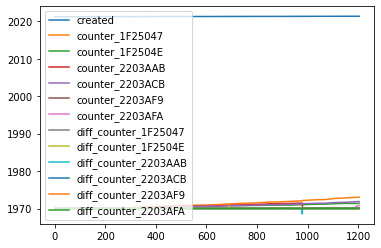

In [60]:
message_data_wide.plot()

### Subselect Data to use, allow getting either counter or diff columns

In [61]:
def get_vis_data(df_source):
    # drop sensor wich was not mounted in kompotoi
    vis_data = df_source.drop(columns = ['counter_2203AF9', 'diff_counter_2203AF9'])
    # drop sensor which did not measure apparently
    vis_data = vis_data.drop(columns = ['counter_2203AFA', 'diff_counter_2203AFA'])
    # subselect data from testing period
    vis_data = vis_data[vis_data['created'].dt.date <= pd.to_datetime('2021-04-20')]
    vis_data = vis_data[vis_data['created'].dt.date >= pd.to_datetime('2021-03-24')]
    return vis_data


In [62]:
def get_sub_columns(df, diff_values : bool, index : str):
    if diff_values:
        columns = list(df.columns[df.columns.str.startswith('diff_')])
    else:
        columns = list(df.columns[df.columns.str.startswith('counter_')])

    if index != '':
        columns.append(index)
    return columns

### Don't allow negative values, remove too big diffs that represent value losses

In [63]:
print(message_data_wide.isna().sum())

diff_columns = get_sub_columns(message_data_wide, True, '')

for diff_column in diff_columns:
    # us np.nan, because pd.NA is non numeric and cannot be aggregated except after ifillna(0)
    message_data_wide.loc[message_data_wide[diff_column] < 0, diff_column] = np.nan
    message_data_wide.loc[message_data_wide[diff_column] > 10, diff_column] = np.nan

message_data_wide.isna().sum()

created                    0
counter_1F25047          108
counter_1F2504E          691
counter_2203AAB          184
counter_2203ACB            1
counter_2203AF9          358
counter_2203AFA         1165
diff_counter_1F25047       1
diff_counter_1F2504E       1
diff_counter_2203AAB       1
diff_counter_2203ACB       1
diff_counter_2203AF9       1
diff_counter_2203AFA       1
dtype: int64


created                    0
counter_1F25047          108
counter_1F2504E          691
counter_2203AAB          184
counter_2203ACB            1
counter_2203AF9          358
counter_2203AFA         1165
diff_counter_1F25047       2
diff_counter_1F2504E       2
diff_counter_2203AAB       7
diff_counter_2203ACB       9
diff_counter_2203AF9       3
diff_counter_2203AFA       8
dtype: int64

## Create Daily data overview

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB
0,2021-03-24,107.0,NaN,24.0,66.0,37.0,0.0,0.0,20.0
10,2021-04-03,325.0,NaN,216.5,196.0,7.0,0.0,5.0,1.0
20,2021-04-13,551.0,297.0,388.5,320.0,19.0,3.0,16.0,12.0


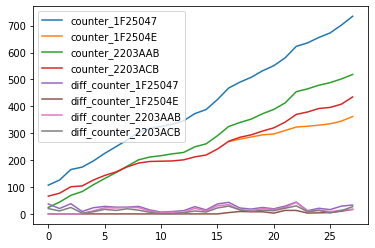

In [104]:
message_data_days = get_vis_data(message_data_wide)
# group by hour
message_data_days.set_index('created', inplace=True)

# resample days, take daily end value for cummulative, sum for differential
counters = message_data_days[get_sub_columns(message_data_days, False, '')].resample('D').max()
diffs = message_data_days[get_sub_columns(message_data_days, True, '')].resample('D').sum()
# merge
message_data_days = pd.merge(counters, diffs, on='created', how='outer')

message_data_days.reset_index(inplace=True)
# message_data_days[get_sub_columns(message_data_days, True, '')] = message_data_days[get_sub_columns(message_data_days, True, '')].resample('D').sum()
# inplace here to have created as valid column again to do [1:]

# # select date only, rest is 0
message_data_days['created'] = message_data_days['created'].dt.date

message_data_days.plot()
message_data_days.loc[::10]

### Group by hours of day

,hour_of_day,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB
0,0,1.0,0.0,0.0,0.0
10,10,54.0,8.0,43.5,38.0
20,20,1.0,1.0,1.0,2.0


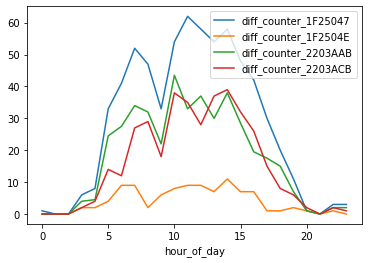

In [99]:
message_data_day = get_vis_data(message_data_wide)
# only use diffs
message_data_day = message_data_day[get_sub_columns(message_data_day, True, 'created')]

hours = message_data_day['created'].dt.hour

message_data_day = message_data_day.groupby(hours).sum()
message_data_day.reset_index(inplace = True)
message_data_day.rename(columns = {'created': 'hour_of_day'}, inplace=True)

# print(message_data_wide.isna().sum())
message_data_day.plot(x='hour_of_day')
message_data_day.loc[::10]

### Group by days of week

In [127]:
message_data_week = get_vis_data(message_data_wide)
# only use diffs
message_data_week = message_data_week[get_sub_columns(message_data_week, True, 'created')]

day_of_week = message_data_week['created'].dt.day_name()
# group
message_data_week = message_data_week.groupby(day_of_week).sum()
message_data_week.reset_index(inplace=True)
# sort by weekday
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#cats = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

message_data_week.sort_values('created', key=make_sorter(cats), inplace=True)

# translate
def translate_from_dict(original_text, translations):
    if original_text in translations:
        return translations[original_text]
    return original_text

trans_dict = {'Monday':'Montag', 'Tuesday':'Dienstag', 'Wednesday':'Mittwoch', 'Thursday':'Donnerstag', 'Friday':'Freitag', 'Saturday':'Samstag', 'Sunday':'Sonntag'}

message_data_week['created'] = message_data_week['created'].apply(lambda x: translate_from_dict(x, trans_dict))

message_data_week

,created,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB
1,Montag,93.0,18.0,62.0,47.0
5,Dienstag,104.0,20.0,75.5,63.0
6,Mittwoch,106.0,13.0,59.0,67.0
4,Donnerstag,129.0,13.0,96.5,77.0
0,Freitag,108.0,8.0,54.5,67.0
2,Samstag,59.0,13.0,35.5,32.0
3,Sonntag,66.0,13.0,39.5,22.0


### Check max diff values per hour fo AAB

In [67]:
message_data_wide[get_sub_columns(message_data_wide, True, 'created')].sort_values('diff_counter_2203AAB', ascending=False).head()

,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA,created
661,7.0,0.0,5.5,4.0,1.0,0.0,2021-04-08 08:00:00+00:00
828,5.0,3.0,5.5,2.0,0.0,0.0,2021-04-15 07:00:00+00:00
445,6.0,0.0,5.5,4.0,0.0,0.0,2021-03-30 08:00:00+00:00
687,3.0,0.0,5.0,7.0,0.0,0.0,2021-04-09 10:00:00+00:00
691,5.0,2.0,5.0,1.0,0.0,0.0,2021-04-09 14:00:00+00:00


---
# Visualizations

## Cummulative data over time

In [165]:
vis_data = get_vis_data(message_data_wide)

def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                # print(fig.data[i].name)
                if fig.data[i].name in nameSwap.keys():
                    fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)


fig = px.line(vis_data, x='created', y=get_sub_columns(vis_data, False, 'created'), width=1400, height=500, title='WC Besuche über Zeit')
# titles
# fig.update_xaxes(title_text='Datum')
# fig.update_yaxes(title_text='WC-Besuche')
fig.update_layout(
    xaxis_title = 'Datum',
    yaxis_title = 'WC Besuche',
    legend_title = 'Sensoren'
)
# legend
fig = customLegend(fig=fig, nameSwap = \
    { \
        'counter_1F25047' : 'Türriegel Neigung (1F25047)', \
        'counter_2203ACB' : 'Türriegel Magnet (2203ACB)', \
        'counter_1F2504E' : 'Türe unten Beschleunigung (1F2504E)', \
        'counter_2203AFA' : 'Türe oben aussen Magnet (2203AFA)', \
        'counter_2203AAB' : 'Türe oben innen Magnet (2203AAB)', \
        'counter_2203AF9' : 'Test Sensor (nicht installiert) (2203AF9)', \
    })
# Date formatting
fig.update_xaxes(nticks=10, tickformat='%d.%m.%Y') # dtick='D1'

# set color
# fig.data[0].line.color = 'rgb(0, 0, 0)'
# fig.data[1].line.color = 'rgb(0, 0, 255)'

fig.show()

# matiplotlib (date formatting is not so nice)
# ax = message_data_wide[get_sub_columns(False, 'created')].plot(kind='line', x='created', figsize=(22, 5), style='-')

# ax.set_title('WC Besuche über Zeit')
# ax.set_xlabel('Date')
# ax.set_ylabel('WC-Besuche')

# ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data over time

In [179]:

plt = px.line(vis_data, x='created', y=get_sub_columns(vis_data, True, 'created'), width=1400, height=500)

plt.show()

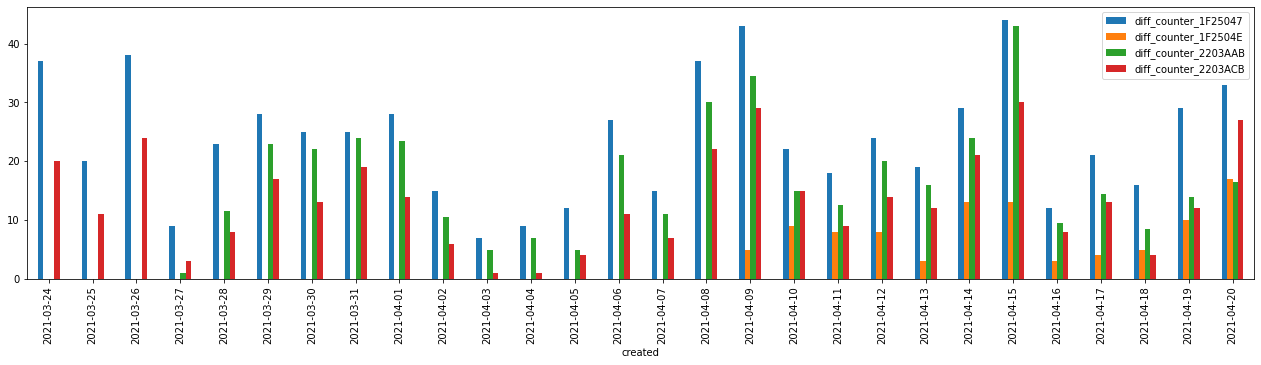

In [105]:
# data timeframe already subselected
ax = message_data_days[get_sub_columns(message_data_days, True, 'created')].plot(kind = 'bar', x='created', figsize=(22, 5))

# ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data during one day

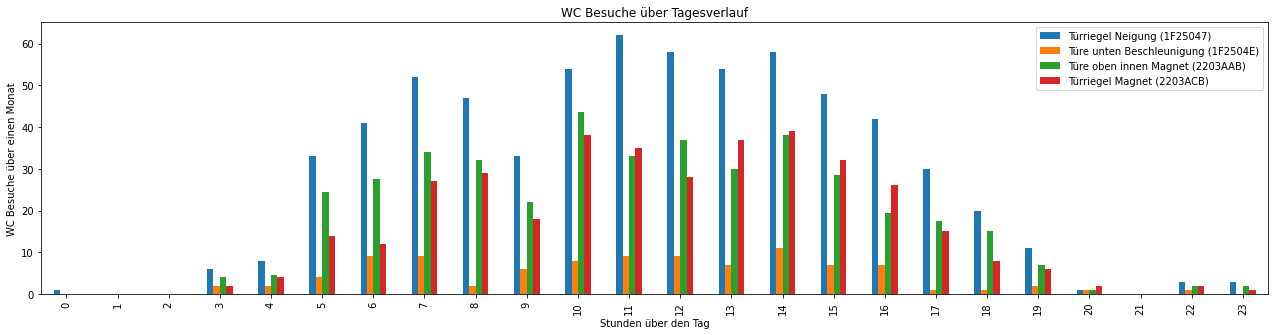

In [131]:
# data timeframe already subselected
ax = message_data_day[get_sub_columns(message_data_day, True, 'hour_of_day')].plot(kind = 'bar', x='hour_of_day', figsize=(22,5))

ax.set_title('WC Besuche über Tagesverlauf')
ax.set_xlabel('Stunden über den Tag')
ax.set_ylabel('WC Besuche über einen Monat')

ax.legend(['Türriegel Neigung (1F25047)', 'Türe unten Beschleunigung (1F2504E)', 'Türe oben innen Magnet (2203AAB)', 'Türriegel Magnet (2203ACB)', 'Türe oben aussen Magnet (2203AFA)', 'Test Sensor (nicht installiert) (2203AF9)'])


## Differential data during one week

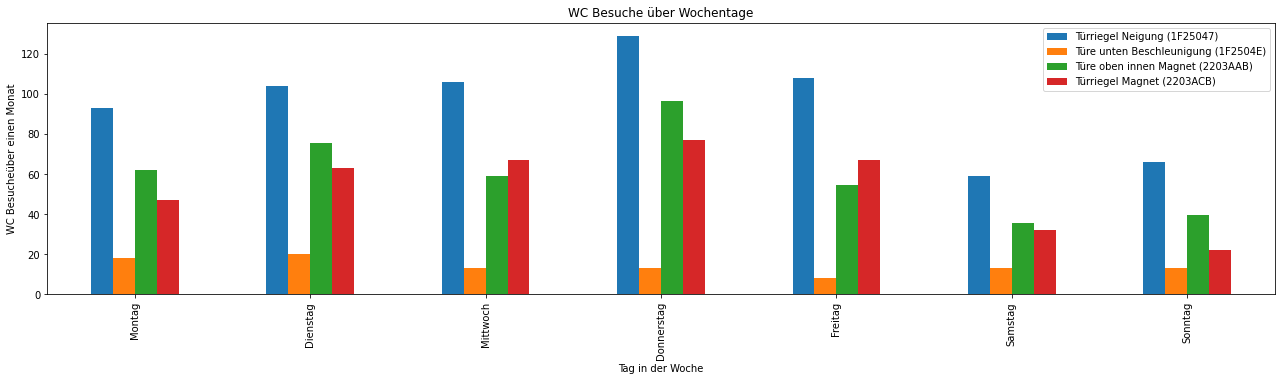

In [132]:

ax = message_data_week[get_sub_columns(message_data_week, True, 'created')].plot(kind = 'bar', x='created', figsize=(22,5))

ax.set_title('WC Besuche über Wochentage')
ax.set_xlabel('Tag in der Woche')
ax.set_ylabel('WC Besucheüber einen Monat')

ax.legend(['Türriegel Neigung (1F25047)', 'Türe unten Beschleunigung (1F2504E)', 'Türe oben innen Magnet (2203AAB)', 'Türriegel Magnet (2203ACB)', 'Türe oben aussen Magnet (2203AFA)', 'Test Sensor (nicht installiert) (2203AF9)'])


---
## Spielwiese

<AxesSubplot:xlabel='created'>

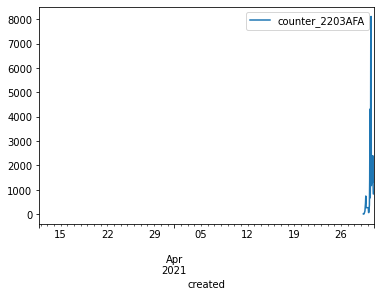

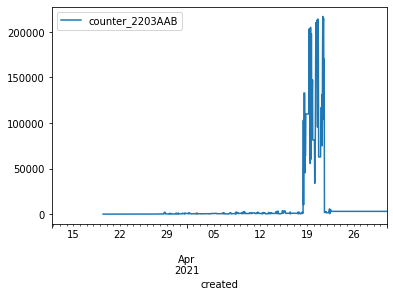

In [212]:
# message_data_wide[['created', 'counter_1F2504E']].plot(x='created')
message_data_wide[['created', 'counter_2203AFA']].plot(x='created')
message_data_wide[['created', 'counter_2203AAB']].plot(x='created')

## google drive api (testing still)

In [213]:
activate = False

# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [214]:
if activate:
    # Rename the downloaded JSON file to client_secrets.json
    # The client_secrets.json file needs to be in the same directory as the script.
    gauth = GoogleAuth()
    drive = GoogleDrive(gauth)
    # List files in Google Drive
    fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
    # for file1 in fileList:
    #   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

In [215]:
if activate:
  fileCons = list()

  for file1 in fileList:
    if 'downloadUrl' in file1:
      fileCons.append(requests.get(file1['downloadUrl']).content)
    else:
      print('unsupported file')
      print(file1)

In [216]:
if activate:
    print(fileCons)

### Jira rest api

In [217]:
activate = False

import requests
import json
import base64

if activate:
   # Base encode email and api token
   cred =  "Basic " + base64.b64encode(b'pascal.berger@students.fhnw.ch:sSrxfdz6DTjt1Sk0C2Wz6071').decode("utf-8") 

   # Set header parameters
   headers = {
      "Accept": "application/json",
      "Content-Type": "application/json",
      "Authorization" : cred
   }
   # Enter your project key here
   projectKey = "SERVICE"

   # Update your site url 
   site_url = "https://kompotoi.atlassian.net/rest/api/3"

### Access issues

In [218]:
if activate:
    url = f"{site_url}/search?jql=project={projectKey}"

    # Send request and get response
    response = requests.request("GET", url, headers=headers)

    # Decode Json string to Python
    json_data = json.loads(response.text)

    # Display issues
    # json_data["issues"]

    for item in json_data["issues"]:

        print(item["id"] + "\t" + item["key"] + "\t" +
            item["fields"]["issuetype"]["name"] + "\t" +
            item["fields"]["created"]+ "\t" +
            item["fields"]["creator"]["displayName"] + "\t" +
            item["fields"]["status"]["name"] + "\t" +
            item["fields"]["summary"] + "\t" 
            )

        # print(item["fields"]["status"]["name"])

#### Move issue

In [219]:
if activate:
    done_id = 41
    # get id of first element
    issue_id = json_data["issues"][0]['id']

    url = f"{site_url}/issue/{issue_id}/transitions?expand=transitions.fields"

    json_content = \
    '''
    {
        "transition":
        {
            "id" : ''' + f"'{str(done_id)}'" + '''
        }
    }
    '''
    json_content

    # Send request and get response
    # response = requests.request("POST", url, headers=headers, data=json_content)

    # json_data = json.loads(response.text)
    # json_data

#### Create issue

In [220]:
if activate:
  url = f"{site_url}/issue"

  json_content = \
  '''
  {
      "fields": {
        "project":
        {
            "key": "''' + projectKey + '''"
        },
        "summary": "REST ye merry gentlemen.",
        "description": {
            "type": "doc",
            "version": 1,
            "content": [
              {
                "type": "paragraph",
                "content": [
                  {
                    "type": "text",
                    "text": "description"
                  }
                ]
              }
            ]
          },
        "issuetype": {
            "name": "Bug"
        }
    }
  }
  '''
  # json_content

  # Send request and get response
  response = requests.request("POST", url, headers=headers, data=json_content)

  # Decode Json string to Python
  json_data = json.loads(response.text)
  json_data
  # response.textp